<a id="goal"></a>
## Project Description and Goal

<font color="blue">
    
We’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we decide to try to attract investors. <br>
We have to prepare some market research on open-source data on restaurants in LA.  

## Step 1. Open the data file and study the general information

In [1]:
!pip install usaddress

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import usaddress

In [3]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [5]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
data.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [8]:
data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

<font color="blue">
    
The data has 9651 rows and 6 columns.
there are 3 missing values in `chain`column.    

## Step 2. Data preprocessing

###  Processing missing values

In [9]:
data[data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [10]:
data[data['object_name'].str.contains('JAMMIN JIMMY')]  

,id,object_name,address,chain,object_type,number
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1


In [11]:
data.query('object_name=="THE LEXINGTON THEATER" or object_name=="TAQUERIA LOS 3 CARNALES"')

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [12]:
data.dropna(inplace=True)

### Data type replacement

In [13]:
data.id=data.id.astype(object)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   object
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 527.6+ KB


### Processing duplicates

In [15]:
data.duplicated().sum()

0

## Conclusion

<font color="blue">
    
There were 3 missing values in column chain that we droped them, due to the small number.   
We checked each column for the correct data type. Also for duplicates.  


<a id="Analysis"></a>
## Step 3. Exploratory data analysis

 - **Investigating the proportions of the various types of establishments**

In [16]:
data.object_type.unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [17]:
data_grouped=data.groupby('object_type').count().reset_index()[['object_type', 'id']]
data_grouped

,object_type,id
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,319
5,Restaurant,7253


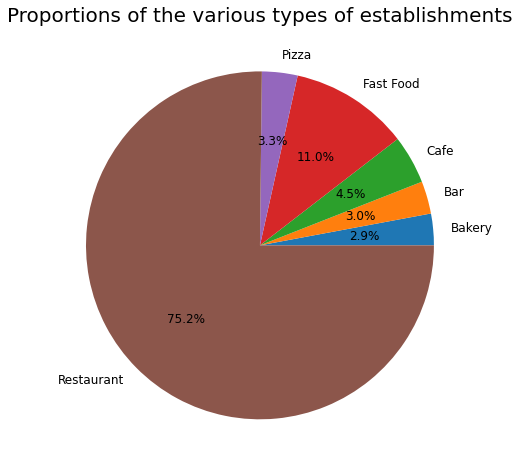

In [18]:
fig ,ax =plt.subplots(figsize=(8,8))
ax.pie(data_grouped.id , labels=data_grouped.object_type, autopct='%1.1f%%',textprops = {"fontsize":12})
ax.set_title('Proportions of the various types of establishments',fontsize=20)
plt.show()

<font color="blue">
    
The largest share of establishments is allocated to Restaurant with 75%. <br> 
FastFood is in the next position with 11%. <br>
Cafe with 4.5%.     <br> 
Pizza, Bar and Bakery have almost the same share about 3%.

In [19]:
data.head(1)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26


In [20]:
Dictionary = {True: 'chain', False: 'nonchain'}
data['chain']=data['chain'].map(Dictionary )

In [21]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,nonchain,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,nonchain,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,nonchain,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,nonchain,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,nonchain,Restaurant,20


- **Investigating the proportions of chain and nonchain establishments.**

In [22]:
data_grouped=data.groupby('chain').count().reset_index()[['chain','id']]
data_grouped

,chain,id
0,chain,3676
1,nonchain,5972


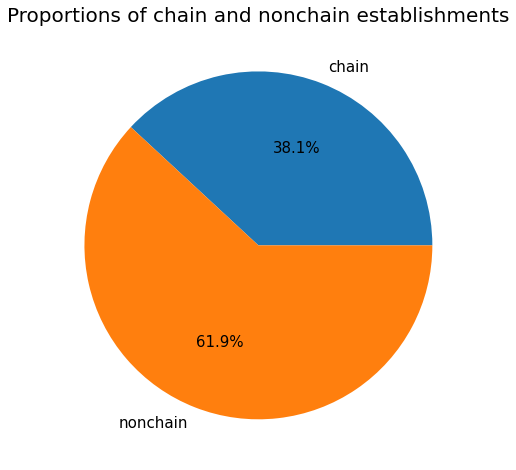

In [23]:
fig ,ax =plt.subplots(figsize=(8,8))
ax.pie(data_grouped.id , labels=data_grouped.chain, autopct='%1.1f%%', textprops = {"fontsize":15})
ax.set_title('Proportions of chain and nonchain establishments' , fontsize=20)
plt.show()

<font color="blue">
    
Most establishments are not chain. The chain to non-chain ratio is approximately 60 to 40.   

In [24]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,nonchain,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,nonchain,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,nonchain,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,nonchain,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,nonchain,Restaurant,20


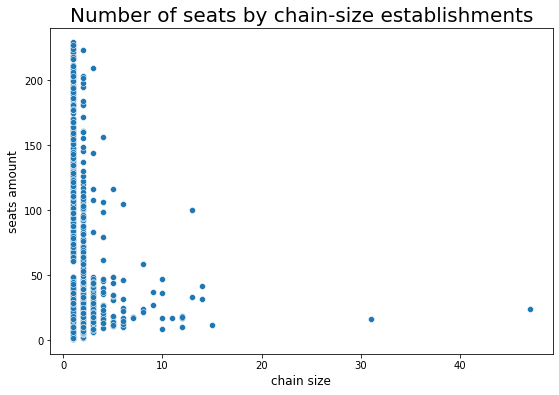

In [25]:
df=data.query('chain=="chain"').groupby('object_name').agg({'address':'count', 'number':'median'}).\
rename(columns={'address':'chain size', 'number':'median seats amount'})

fig,ax=plt.subplots(figsize=(9,6))
ax=sns.scatterplot(x='chain size', y='median seats amount', data=df)
ax.set_title('Number of seats by chain-size establishments' , fontsize=20)
ax.set_xlabel('chain size',fontsize=12)
ax.set_ylabel('seats amount',fontsize=12);

<font color="blue">
The distribution shows that in chain category we have many establishments with a small number of seats.      
    

 - **Determining the average number of seats for each type of establishment.**

posx and posy should be finite values
posx and posy should be finite values


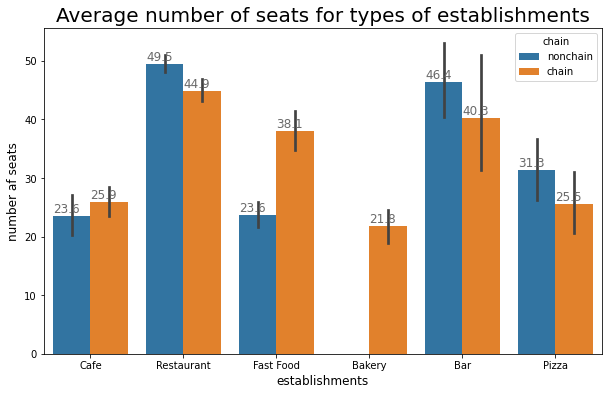

In [26]:
fig ,ax =plt.subplots(figsize=(10,6))
ax=sns.barplot(x='object_type', y='number', data=data, hue='chain' )
ax.set_title('Average number of seats for types of establishments' , fontsize=20)
ax.set_xlabel('establishments',fontsize=12)
ax.set_ylabel('number af seats',fontsize=12)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_x()+.0, i.get_height()+.6, 
     str(round((i.get_height()), 1)), fontsize=12, color='dimgrey')
    
plt.show()

<font color="blue">

We can see that: 
  - The average number of seats is for all types under 50 seats.  
  - Bakery is typically a chain. 
  - On average, nonchain restaurants have the greatest number of seats. 
  - On average, restaurants and bars have the greatest number of seats.

- **Puting the data on street names from the address column in a separate column**

In [27]:
data.address

0            3708 N EAGLE ROCK BLVD
1               100 WORLD WAY # 120
2         6801 HOLLYWOOD BLVD # 253
3                1814 W SUNSET BLVD
4                2100 ECHO PARK AVE
                   ...             
9646               217 W TEMPLE AVE
9647               5750 MELROSE AVE
9648            6741 HOLLYWOOD BLVD
9649        548 S SPRING ST STE 100
9650    1300 S SAN PEDRO ST STE 111
Name: address, Length: 9648, dtype: object

In [28]:
def cleaning(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=str(dict_address['StreetName'])
    return clean_adress

In [29]:
data['street']=data.address.apply(cleaning)
data.head()

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,nonchain,Cafe,26,ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,nonchain,Restaurant,9,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,nonchain,Fast Food,20,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,nonchain,Restaurant,22,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,nonchain,Restaurant,20,PARK


 - **Ploting a graph of the top ten streets by number of restaurants**

In [30]:
data_street=data.query('object_type=="Restaurant"').groupby('street').agg({'object_type':'count'}).sort_values('object_type', ascending=False).reset_index()
data_street.head(10)

,street,object_type
0,WILSHIRE,319
1,SUNSET,297
2,WESTERN,292
3,PICO,283
4,OLYMPIC,257
5,FIGUEROA,234
6,VERMONT,218
7,3RD,207
8,MONICA,204
9,HOLLYWOOD,197


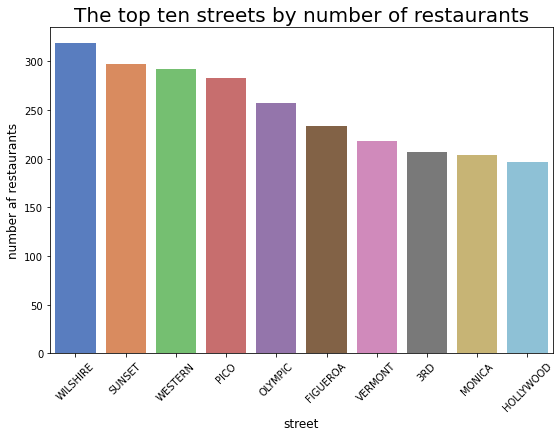

In [31]:
fig,ax=plt.subplots(figsize=(9,6))
ax=sns.barplot(x='street' , y='object_type', data= data_street.head(10), palette='muted' )
ax.set_title('The top ten streets by number of restaurants' , fontsize=20)
ax.set_xlabel('street',fontsize=12)
ax.set_ylabel('number af restaurants',fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

- **Finding the number of streets that only have one restaurant.**

In [32]:
len(data_street.query('object_type==1'))

178

<font color="blue">
    
There are 178 streets that only have one restaurant.    

- **ploting the distribution of the number of seats for 3 streets with the largest number of restaurants.**

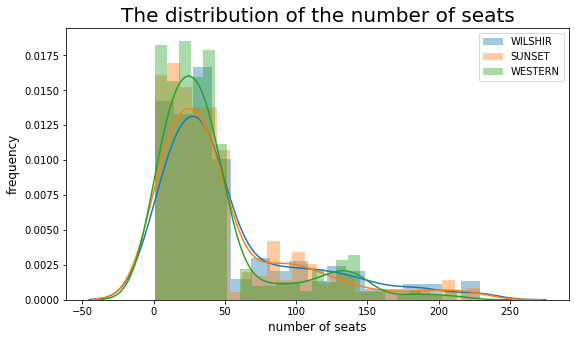

In [33]:
fig ,ax =plt.subplots(figsize=(9,5))
sns.distplot(data.query('street=="WILSHIRE"')['number'], label='WILSHIR')
sns.distplot(data.query('street=="SUNSET"')['number'],label='SUNSET')
sns.distplot(data.query('street=="WESTERN"')['number'],label='WESTERN')

ax.set_title('The distribution of the number of seats' , fontsize=20)
ax.set_xlabel('number of seats',fontsize=12)
ax.set_ylabel('frequency',fontsize=12)
ax.legend()

plt.show()

<font color="blue">
    
We see that a large number of restaurants on all three streets have less than 50 seats.   

## Conclusion

<font color="blue">
    
The proportions of the various types of establishments are: 
    
  - Restaurant 75%.    
  - FastFood 11%.    
  - Cafe 4.5%     
  - Pizza, Bar and Bakery about 3%.
    
The chain to non-chain ratio is approximately 60 to 40. 
    
The average number of seats is for all types under 50 seats.  
Bakery is typically a chain. 
On average, nonchain restaurants have the greatest number of seats. 
On average, restaurants and bars have the greatest number of seats.
    
There are 178 streets that only have one restaurant. 
    
a large number of restaurants on the three streets(with the largest number of restaurants) have less than 50 seats.

## step 4: Overall Conclusion

<font color="blue">
    
### [Goal](#goal)
preparing some market research.
    
### [Analysis and Key Findings](#Analysis)
The proportions of the various types of establishments are: 
    
  - Restaurant 75%.    
  - FastFood 11%.    
  - Cafe 4.5%     
  - Pizza, Bar and Bakery about 3%.
    
The chain to non-chain ratio is approximately 60 to 40. 
    
The average number of seats is for all types under 50 seats.  
Bakery is typically a chain. 
On average, nonchain restaurants have the greatest number of seats. 
On average, restaurants and bars have the greatest number of seats.
    
There are 4070 streets that only have one restaurant. 
    
a large number of restaurants on the three streets(with the largest number of restaurants) have less than 30 seats. 
    
### Final Conclusion and Suggestions  
    
1- Due to the novelty of the idea of waiter robots, it is better to do the establishment in more crowded areas (streets with more restaurants) in order to be seen better.
    
2- Considering that many restaurants on crowded streets have less than 50 seats, maybe it would be a good idea to start with more seats (at least 50 seats) in order to be seen better. 
    
3- Regarding being a chain or not, considering the costly nature of the project, it is good to start with a branch first and decide on the development of the chain in the future.  
 

**Presentation link:** <https://github.com/fateme-seyedi/Portfolio-Research-on-restaurants/blob/main/market%20research.pdf> 